<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/BidirectionalRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Bidirectional RNN**

In unidirectional RNN , RNN is applied in time steps like at t1 ,t2 and so on.yhat is the final output of unidirectional RNN.yhat is dependant on output at time t1 ,t2 and so on.But what if the future inputs to the model affects on past outputs like example let we have two sentences , 1)I love amazon , its a great website. 2)I love amazon , its a beautiful river. When we proces these two sentences and give as a input to unidirectional RNN model, it gets confused with the context of meaning of two amazon in the dataset. It would have been better had we something to tell us the context of second Amazon word . SO in this way future inputs to the model is affecting the past output.


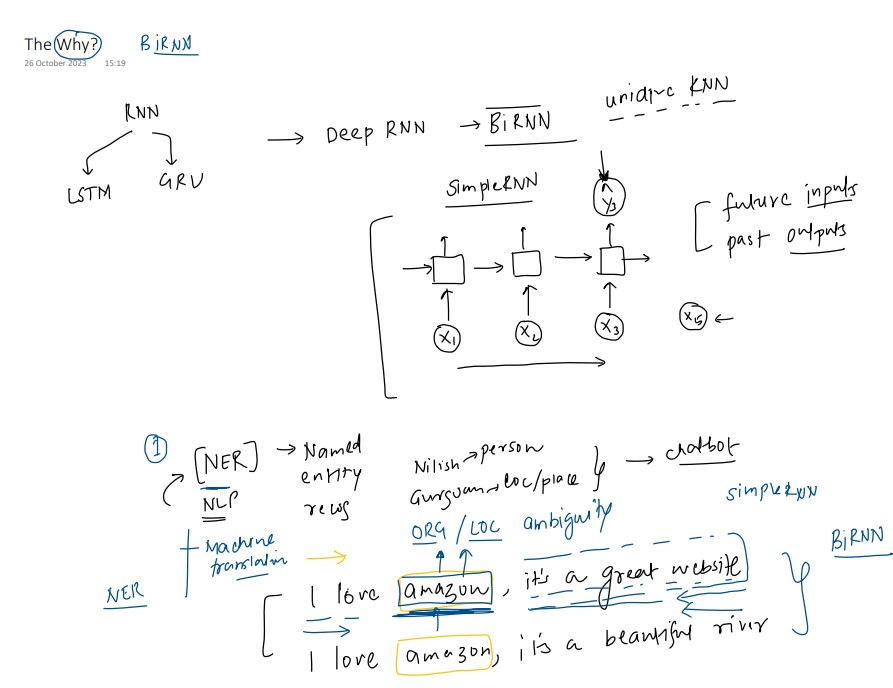

**Bidirectional RNN architecture**

SO we have these two sentences , 1)Amazon is the best website , 2)Amazon is the River. And we want to know the context and meaning of the word 'amazon' in both sentence.

We have two unidirectional RNN in Bidirectional RNN. One is Forward RNN and Backword RNN.

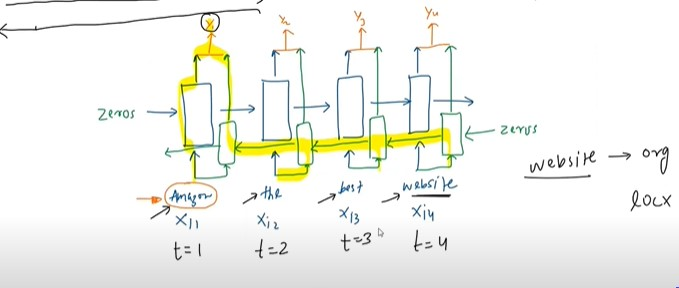


We have drawn bidirectional RNN as above.While calculating the output(y1) of time t1 , we have contribution of word website which is shown in yello color line. And in this way the model gets to know about the word amazon is a wesite in this sentence.Same with the calculation of y2 , y3 and y4 , we have a contribution of each word in calculating the output of each time step output.

We have bidirectional LSTM as well as bidirectional GRU's. Bidirectional LSTM is also known as BILSTM.

**Applications of BI-RNN** -

1) Name Entity Recognition - NER is about finding and classifying proper names in text into predefined categories like Karan is person,Paris is location and Amazon is a river.

2) Parts of speech tagging - POS tagging means labelling each word in a sentence with its part os speech like noun,verb,Adjective , Adverb.

3) Machine translation - Task which involves automatic translation  of text from one language to another using deep learning or rule based methods.

4) Sentiment Analysis - We have review dataset and we have to tell reviews are positive or negative which means we have to tell the sentiment of the review.

5) Time Series Forcasting like whether forcasting or stock market prediction.

**Drawbacks of Bi-RNN**-

1) Conmplexity increases with increase in more number of trainable parameters.

2) When we dont have whole data available then we wont be able to apply Bi-RNN.Example is real time machine translation problem where i am speaking a sentence and on the go i want to convert it into another language.

**Implementation of Bi-RNN In Keras**

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,Bidirectional,LSTM,GRU,Dense

In [7]:
#Loading the dataset
num_words = 10000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

In [8]:
#Pad sequences
maxlen = 100 #Defining the maximum sequence length
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

In [11]:
#Building the bidirectional RNN model
embedding_dim = 32 #This is the dimensions of embedding layer
model = Sequential()
model.add(Embedding(input_dim=num_words,output_dim=embedding_dim,input_length=maxlen))
model.add(Bidirectional(SimpleRNN(5))) #5 RNN units
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

If you want to define the **bidirectional LSTM** then use :

model.add(Bidirectional(LSTM(5)))

If you want to define the **bidirectional GRU** then use :

model.add(Bidirectional(GRU(5)))
